In [114]:
import pandas as pd

#Reading raw data
data = pd.read_csv('hs_2017_nooutliers.csv')
display(data)

,ISSUE_KEY,RESOLUTION,PRODUCT,SEVERITY,UPDATED_TIMESTAMP,PLATFORM,RESOLVED_TIMESTAMP,GROUP_NAMES_SEPARATED,CREATED_TIMESTAMP,COE_NAMES_SEPARATED_COPY,EUI_OR_SIB,RESOLUTION_TIME,HOUR_TO_COMPLETION,CASE WHEN HOUR_TO_COMPLETION IS NOT NULL AND HOUR_TO_COMPLETION <= RESOLUTION_TIME THEN TRUE ELSE FALSE END
0,NGF-425,Fixed,NaN,P2,Jan-21,NaN,Apr-20,FC - Field Forms,Apr-20,Field Collaboration,EUI,72.0,24.0,True
1,NGF-440,Won't Fix,Reporting,P3,Jan-21,iOS,Apr-20,FC - Field Forms,Mar-20,Field Collaboration,EUI,360.0,624.0,False
2,NGF-228,Done,NGF Talentica,P3,Jan-21,Android,Apr-20,FC - Field Forms,Mar-20,Field Collaboration,EUI,360.0,672.0,False
3,NGF-478,Fixed,NaN,P2,Jan-21,Web,Apr-20,FC - Field Forms,Apr-20,Field Collaboration,EUI,72.0,72.0,True
4,NGF-372,Duplicate,NGF Talentica,P2,Jan-21,Backend,Apr-20,FC - Field Forms,Mar-20,Field Collaboration,EUI,72.0,120.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9906,BIMCAS-14391,NaN,NaN,NaN,Jan-22,Windows,NaN,B4C - BIM Platform,Oct-21,BIM for Construction,NaN,NaN,NaN,False
9907,BLT-3681,NaN,NaN,NaN,Jan-22,Web,NaN,BR - Bidding,Nov-21,Bidding & Risk,NaN,NaN,NaN,False
9908,ACSBP-2095,NaN,Platform,NaN,Jan-22,Backend,NaN,NX - Frameworks,Feb-21,Nexus,NaN,NaN,NaN,False
9909,ACSBP-2277,NaN,NaN,NaN,Jan-22,Backend,NaN,NX - Frameworks,Apr-21,Nexus,NaN,NaN,NaN,False


In [144]:
#Extracting only EUIs
EUI_only =  data['EUI_OR_SIB']=='EUI'
data_EUI = data[EUI_only]

#Extracting relevant variables
data_analy = data_EUI[["ISSUE_KEY","RESOLVED_TIMESTAMP","SEVERITY", "GROUP_NAMES_SEPARATED","COE_NAMES_SEPARATED_COPY","RESOLUTION_TIME","HOUR_TO_COMPLETION"]]
data_analy.describe(include='all')


,ISSUE_KEY,RESOLVED_TIMESTAMP,SEVERITY,GROUP_NAMES_SEPARATED,COE_NAMES_SEPARATED_COPY,RESOLUTION_TIME,HOUR_TO_COMPLETION
count,1564,1479,1564,1454,1530,1564.000000,1479.000000
unique,1564,22,3,28,13,NaN,NaN
top,NGF-425,Nov-21,P2,FC - Field Forms,Construction Records,NaN,NaN
freq,1,136,941,190,305,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,169.519182,385.787018
std,NaN,NaN,NaN,NaN,NaN,140.440306,1004.697594
min,NaN,NaN,NaN,NaN,NaN,6.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,72.000000,72.000000
50%,NaN,NaN,NaN,NaN,NaN,72.000000,144.000000
75%,NaN,NaN,NaN,NaN,NaN,360.000000,360.000000


In [145]:
#Transforming severity levels into numbers for further calculation
severity_nums = {"SEVERITY":     {"P1": 3, "P2": 2, "P3" :1 }}
data_analy = data_analy.replace(severity_nums)

data_analy['HOUR_TO_COMPLETION'] = data_analy['HOUR_TO_COMPLETION'].replace(0,1) 
#Replacing zero with one so to avoid inf values

,ISSUE_KEY,RESOLVED_TIMESTAMP,SEVERITY,GROUP_NAMES_SEPARATED,COE_NAMES_SEPARATED_COPY,RESOLUTION_TIME,HOUR_TO_COMPLETION,Health Score
0,NGF-425,Apr-20,2,FC - Field Forms,Field Collaboration,72.0,24.0,6.000000
1,NGF-440,Apr-20,1,FC - Field Forms,Field Collaboration,360.0,624.0,0.576923
2,NGF-228,Apr-20,1,FC - Field Forms,Field Collaboration,360.0,672.0,0.535714
3,NGF-478,Apr-20,2,FC - Field Forms,Field Collaboration,72.0,72.0,2.000000
4,NGF-372,Apr-20,2,FC - Field Forms,Field Collaboration,72.0,120.0,1.200000
5,NGF-486,Apr-20,1,FC - Field Forms,Field Collaboration,360.0,24.0,15.000000
6,KRAANG-3762,Apr-20,2,CR - Docs Core,Construction Records,72.0,144.0,1.000000
7,SCMP-616,Apr-20,2,FR - Frameworks,Frameworks,72.0,48.0,3.000000
8,SCMP-608,Apr-20,2,FR - Frameworks,Frameworks,72.0,72.0,2.000000
9,SCPJM-3688,Apr-20,2,PC - Project Management,Project Controls,72.0,216.0,0.666667


In [149]:
#Removing NA Values
data_analy = data_analy[data_analy['Health Score'].notna()]
data_analy = data_analy[data_analy['COE_NAMES_SEPARATED_COPY'].notna()]
data_analy = data_analy[data_analy['GROUP_NAMES_SEPARATED'].notna()]

In [296]:
#Using a loop to calculate each COE's variables

import statistics

COE_Sev=[]
COE_EUIs=[]
COE_per_breach=[]
COE_hour=[]
COE_hour1=[]
m=0
k=0

COE_names=data_analy['COE_NAMES_SEPARATED_COPY'].unique()
for i in COE_names:
    x=data_analy.loc[data_analy['COE_NAMES_SEPARATED_COPY'] == i]
    y=len(x)
    for j in range(0,len(x)):
        if x.iloc[j,5] >= x.iloc[j,6]:
            k=k+1
        else:
            m=x.iloc[j,6]-x.iloc[j,5]
            m=((m/(x.iloc[j,5]))*100)
            COE_hour.append(m)
        
    COE_EUIs.append(len(x.index))
    COE_per_breach.append(100-((k/y)*100))
    COE_hour1.append(statistics.median(COE_hour))
    COE_Sev.append(x.iloc[:,2].mean())
    k=0
    m=0

COE_tot=pd.DataFrame(COE_names, columns=['COE_names'])
COE_tot['EUI Numbers']=COE_EUIs
COE_tot['Breach %']=COE_per_breach
COE_tot['Deviation %']=COE_hour1
COE_tot['Severity']=COE_Sev

COE_tot #Here we can see each COE's KPIs


,COE_names,EUI Numbers,Breach %,Deviation %,Severity
0,Field Collaboration,229,68.558952,220.000000,1.598253
1,Construction Records,290,45.862069,166.666667,1.644828
2,Frameworks,223,61.434978,166.666667,1.910314
3,Project Controls,69,46.376812,166.666667,1.608696
4,Ecosystem & Infrastructure,6,50.000000,166.666667,1.666667
5,Lifecycle,48,50.000000,166.666667,1.895833
6,Work Breakdown & Planning,133,47.368421,166.666667,1.669173
7,Common Services,107,69.158879,166.666667,1.719626
8,BIM for Construction,88,36.363636,166.666667,1.659091
9,Enterprise,33,51.515152,166.666667,1.606061


In [300]:
#Now trying two different approaches to standartize the variables.
#First is min-max

import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(COE_tot.loc[:, COE_tot.columns != 'COE_names'])
COE_tot_stand = pd.DataFrame(x_scaled)
COE_tot_stand

,0,1,2,3
0,0.786713,0.849304,1.0,0.000000
1,1.000000,0.318282,0.0,0.149248
2,0.765734,0.682630,0.0,1.000000
3,0.227273,0.330325,0.0,0.033463
4,0.006993,0.415094,0.0,0.219231
5,0.153846,0.415094,0.0,0.953597
6,0.451049,0.353525,0.0,0.227262
7,0.360140,0.863340,0.0,0.388940
8,0.293706,0.096055,0.0,0.194955
9,0.101399,0.450543,0.0,0.025019


In [303]:
#Now Z Scores

cols = list(COE_tot.iloc[:,1:].columns)
for col in cols:
    col_zscore = col + '_zscore'
    COE_tot[col_zscore] = (COE_tot[col] - COE_tot[col].mean())/COE_tot[col].std(ddof=0)

COE_tot

,COE_names,EUI Numbers,Breach %,Deviation %,Severity,EUI Numbers_zscore,Breach %_zscore,Deviation %_zscore,Severity_zscore
0,Field Collaboration,229,68.558952,220.000000,1.598253,1.428566,1.125231,3.464102,-1.124671
1,Construction Records,290,45.862069,166.666667,1.644828,2.136157,-0.637762,-0.288675,-0.658292
2,Frameworks,223,61.434978,166.666667,1.910314,1.358967,0.571872,-0.288675,2.000190
3,Project Controls,69,46.376812,166.666667,1.608696,-0.427410,-0.597779,-0.288675,-1.020104
4,Ecosystem & Infrastructure,6,50.000000,166.666667,1.666667,-1.158200,-0.316346,-0.288675,-0.439604
5,Lifecycle,48,50.000000,166.666667,1.895833,-0.671007,-0.316346,-0.288675,1.855187
6,Work Breakdown & Planning,133,47.368421,166.666667,1.669173,0.314981,-0.520755,-0.288675,-0.414507
7,Common Services,107,69.158879,166.666667,1.719626,0.013384,1.171830,-0.288675,0.090713
8,BIM for Construction,88,36.363636,166.666667,1.659091,-0.207013,-1.375558,-0.288675,-0.515465
9,Enterprise,33,51.515152,166.666667,1.606061,-0.845004,-0.198656,-0.288675,-1.046491


<AxesSubplot:>

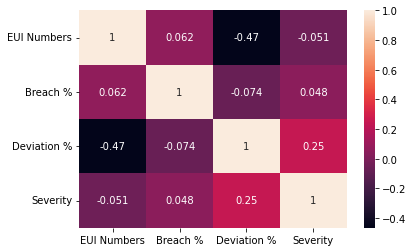

In [266]:
#Correlation Matrix between the different variables

import seaborn as sns


COE_tot_cor=COE_tot.loc[:, COE_tot.columns != 'COE_names']
correlation_mat = COE_tot_cor.corr()
sns.heatmap(correlation_mat, annot = True)


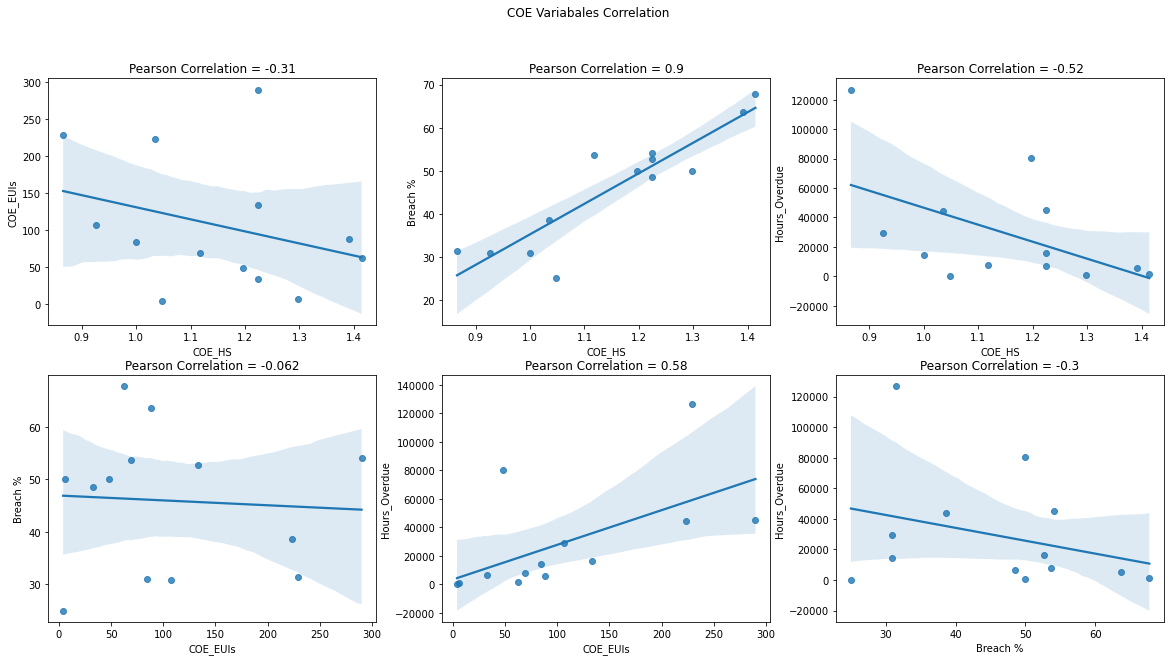

In [228]:
#Irrelavant for now.


#import seaborn as sns

#fig, axs = plt.subplots(2, 3,figsize=(20,10))
#ig.suptitle('COE Variabales Correlation')

#sns.regplot(x='COE_HS', y='COE_EUIs', data=COE_tot,ax=axs[0,0])
#axs[0,0].set(title='Pearson Correlation = -0.31')
#sns.regplot(x='COE_HS', y='Breach %', data=COE_tot,ax=axs[0,1])
#axs[0,1].set(title='Pearson Correlation = 0.9')
#sns.regplot(x="COE_HS", y="Hours_Overdue", data=COE_tot,ax=axs[0,2])
#axs[0,2].set(title='Pearson Correlation = -0.52')
#sns.regplot(x="COE_EUIs", y="Breach %", data=COE_tot,ax=axs[1,0])
#axs[1,0].set(title='Pearson Correlation = -0.062')
#sns.regplot(x="COE_EUIs", y="Hours_Overdue", data=COE_tot,ax=axs[1,1])
#axs[1,1].set(title='Pearson Correlation = 0.58')
#sns.regplot(x="Breach %", y="Hours_Overdue", data=COE_tot,ax=axs[1,2])
#axs[1,2].set(title='Pearson Correlation = -0.3')


#plt.show()

In [304]:
#Using a loop to calculate each group's variables

group_Sev=[]
group_EUIs=[]
group_per_breach=[]
group_hour=[]
group_hour1=[]
bb=[]
k=0
m=0
groups_names=data_analy['GROUP_NAMES_SEPARATED'].unique()
for i in groups_names:
    x=data_analy.loc[data_analy['GROUP_NAMES_SEPARATED'] == i]
    y=len(x)
    for j in range(0,len(x)):
        if x.iloc[j,5] >= x.iloc[j,6]:
            k=k+1
        else:
            m=x.iloc[j,6]-x.iloc[j,5]
            m=((m/(x.iloc[j,5]))*100)
            group_hour.append(m)
            if m>=20000:
                bb.append(x.iloc[j,0])
    group_EUIs.append(len(x.index))
    group_per_breach.append(100-((k/y)*100))
    group_hour1.append(statistics.median(group_hour))
    group_Sev.append(x.iloc[:,2].mean())
    k=0
    m=0

groups_tot=pd.DataFrame(groups_names, columns=['groups_names'])
groups_tot['group_EUIs']=group_EUIs
groups_tot['Breach %']=group_per_breach
groups_tot['Deviation %']=group_hour1
groups_tot['Severity']=group_Sev


groups_tot
#Here we can see each group's different variables

,groups_names,group_EUIs,Breach %,Deviation %,Severity
0,FC - Field Forms,172,70.348837,233.333333,1.616279
1,CR - Docs Core,160,49.375000,166.666667,1.650000
2,FR - Frameworks,86,56.976744,166.666667,1.976744
3,PC - Project Management,64,48.437500,133.333333,1.656250
4,CR - Record Consumption,79,54.430380,166.666667,1.582278
5,EI - Ecosystem,6,50.000000,166.666667,1.666667
6,LM - Project Lifecycle,5,80.000000,166.666667,2.000000
7,WBP - Classic Products,87,47.126437,133.333333,1.793103
8,FC - Field Progress,57,63.157895,166.666667,1.543860
9,FR - Admin,138,64.492754,166.666667,1.869565


In [305]:
#What are the IDs of the EUIs that their deviation percentage is more than 20,000?
bb

['CS-40215',
 'UL-2186',
 'UL-2319',
 'UL-2389',
 'UL-2075',
 'UL-2322',
 'UL-2407',
 'UL-2095',
 'UL-2262',
 'UL-2213']

<AxesSubplot:>

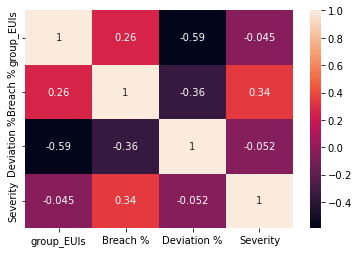

In [278]:
#Correlation Matrix between the different variables

groups_tot_cor=groups_tot.loc[:, groups_tot.columns != 'groups_names']
correlation_mat_2 = groups_tot_cor.corr()
sns.heatmap(correlation_mat_2, annot = True)


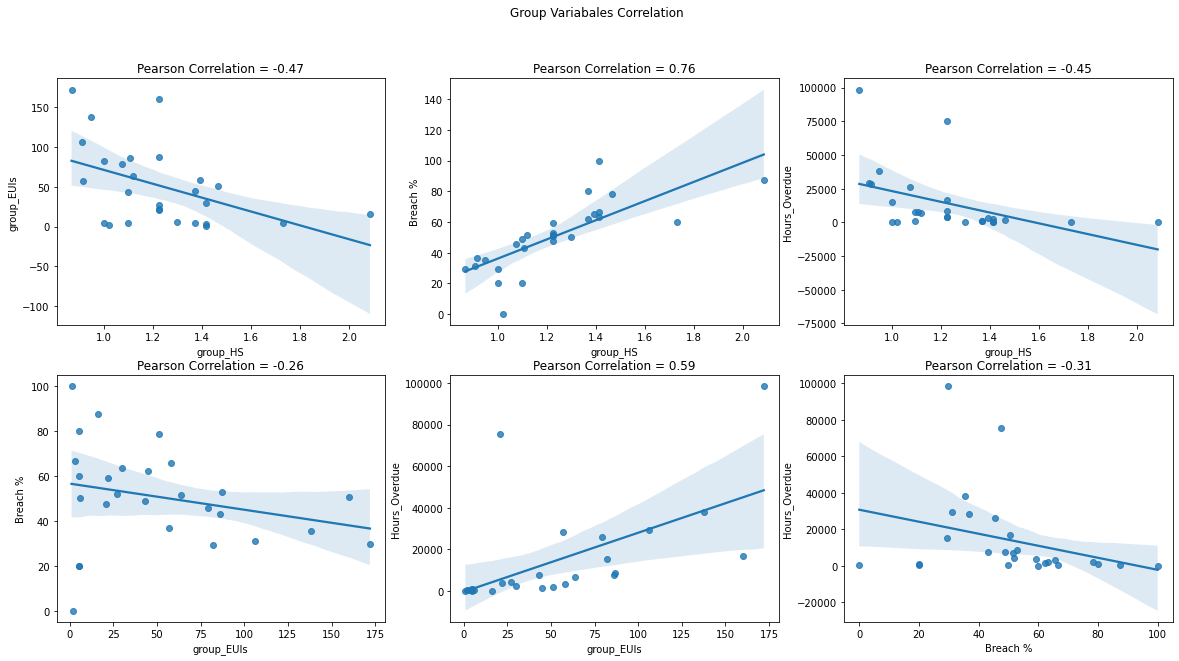

In [233]:
#Irrelavant

#fig, axs = plt.subplots(2, 3,figsize=(20,10))
#fig.suptitle('Group Variabales Correlation')

#sns.regplot(x='group_HS', y='group_EUIs', data=groups_tot,ax=axs[0,0])
#axs[0,0].set(title='Pearson Correlation = -0.47')
#sns.regplot(x='group_HS', y='Breach %', data=groups_tot,ax=axs[0,1])
#axs[0,1].set(title='Pearson Correlation = 0.76')
#sns.regplot(x="group_HS", y="Hours_Overdue", data=groups_tot,ax=axs[0,2])
#axs[0,2].set(title='Pearson Correlation = -0.45')
#sns.regplot(x="group_EUIs", y="Breach %", data=groups_tot,ax=axs[1,0])
#axs[1,0].set(title='Pearson Correlation = -0.26')
#sns.regplot(x="group_EUIs", y="Hours_Overdue", data=groups_tot,ax=axs[1,1])
#axs[1,1].set(title='Pearson Correlation = 0.59')
#sns.regplot(x="Breach %", y="Hours_Overdue", data=groups_tot,ax=axs[1,2])
#axs[1,2].set(title='Pearson Correlation = -0.31')

#plt.show()

In [290]:
#Using a loop to calculate each month variables

from datetime import datetime
import matplotlib.pyplot as plt

months_Sev=[]
months_EUIs=[]
months_per_breach=[]
months_hours=[]
months_hours1=[]
k=0
m=0

months_names=data_analy["RESOLVED_TIMESTAMP"].unique()
months_names=sorted(months_names, key = lambda x: datetime.strptime(x, '%b-%y'))

for i in months_names:
    x=data_analy.loc[data_analy["RESOLVED_TIMESTAMP"] == i]
    y=len(x)
    for j in range(0,len(x)):
        if x.iloc[j,5] >= x.iloc[j,6]:
            k=k+1
        else:
            m=x.iloc[j,6]-x.iloc[j,5]
            m=((m/(x.iloc[j,5]))*100)
            months_hours.append(m)              
    months_EUIs.append(len(x.index))
    months_per_breach.append(100-((k/y)*100))
    months_hours1.append(statistics.mode(months_hours))
    months_Sev.append(x.iloc[:,2].mean())

    k=0
    m=0
    
months_tot=pd.DataFrame(months_names, columns=['months_names'])
months_tot['months_EUIs']=months_EUIs
months_tot['Severity']=months_Sev
months_tot['Breach %']=months_per_breach
months_tot['Deviation %']=months_hours1

months_tot
#Here we can see each month's median and MAD Health Score

,months_names,months_EUIs,Severity,Breach %,Deviation %
0,Apr-20,16,1.750000,62.500000,100.000000
1,May-20,15,1.933333,53.333333,100.000000
2,Jun-20,28,1.857143,71.428571,100.000000
3,Jul-20,34,1.794118,79.411765,33.333333
4,Aug-20,20,1.900000,70.000000,100.000000
5,Sep-20,44,1.840909,72.727273,133.333333
6,Oct-20,59,1.728814,66.101695,33.333333
7,Nov-20,44,1.795455,56.818182,33.333333
8,Dec-20,37,1.945946,54.054054,33.333333
9,Jan-21,44,2.159091,72.727273,33.333333


<AxesSubplot:>

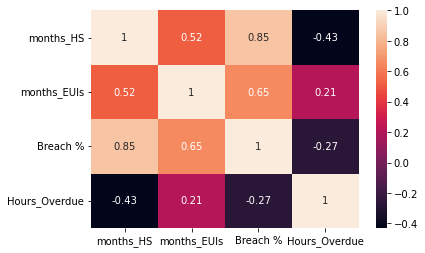

In [220]:
#Correlation Matrix between the different variables

months_tot_cor=months_tot.loc[:, months_tot.columns != 'months_mads']
correlation_mat_3 = months_tot_cor.corr()
sns.heatmap(correlation_mat_3, annot = True)

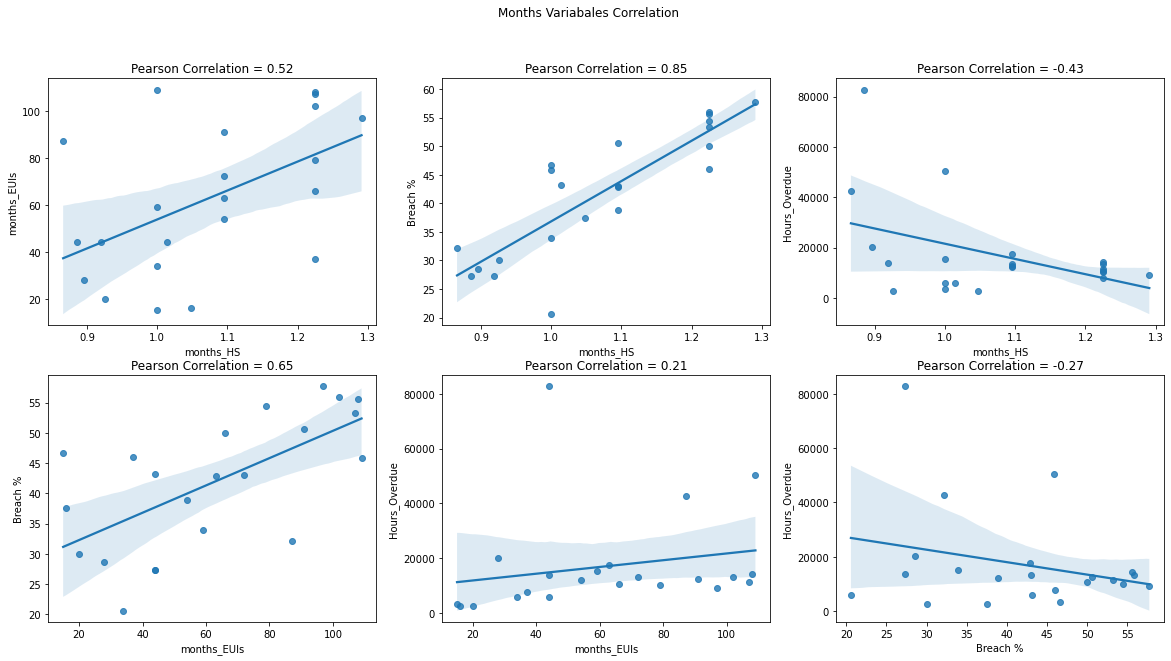

In [234]:
#Irrelavant
#fig, axs = plt.subplots(2, 3,figsize=(20,10))
#fig.suptitle('Months Variabales Correlation')

#sns.regplot(x='months_HS', y='months_EUIs', data=months_tot,ax=axs[0,0])
#axs[0,0].set(title='Pearson Correlation = 0.52')
#sns.regplot(x='months_HS', y='Breach %', data=months_tot,ax=axs[0,1])
#axs[0,1].set(title='Pearson Correlation = 0.85')
#sns.regplot(x="months_HS", y="Hours_Overdue", data=months_tot,ax=axs[0,2])
#axs[0,2].set(title='Pearson Correlation = -0.43')
#sns.regplot(x="months_EUIs", y="Breach %", data=months_tot,ax=axs[1,0])
#axs[1,0].set(title='Pearson Correlation = 0.65')
#sns.regplot(x="months_EUIs", y="Hours_Overdue", data=months_tot,ax=axs[1,1])
#axs[1,1].set(title='Pearson Correlation = 0.21')
#sns.regplot(x="Breach %", y="Hours_Overdue", data=months_tot,ax=axs[1,2])
#axs[1,2].set(title='Pearson Correlation = -0.27')

#plt.show()

In [126]:
months_tot.to_csv('months_hs.csv', index=False)
groups_tot.to_csv('groups.csv', index=False)
COE_tot.to_csv('COE.csv', index=False)